### LP-2

## a. Import the necessary packages

In [86]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import random

## b. Load the training and testing data (MNIST/CIFAR10)

In [87]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [88]:
x_train = x_train / 255
x_test = x_test / 255

In [89]:
x_train_Size = x_train[0]    #Printing size of one image
len , width = x_train_Size.shape
print(len , 'X' , width)

28 X 28


## c. Define the network architecture using Keras

In [90]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(35, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 100)               12900     
                                                                 
 dense_8 (Dense)             (None, 35)                3535      
                                                                 
 dense_9 (Dense)             (None, 10)                360       
                                                                 
Total params: 117,275
Trainable params: 117,275
Non-trainable params: 0
_________________________________________________________________


## d. Train the model using SGD

In [92]:
model.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [93]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6736 - accuracy: 0.8143 - val_loss: 0.2962 - val_accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2744 - accuracy: 0.9208 - val_loss: 0.2288 - val_accuracy: 0.9316
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2167 - accuracy: 0.9366 - val_loss: 0.1910 - val_accuracy: 0.9444
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1793 - accuracy: 0.9478 - val_loss: 0.1633 - val_accuracy: 0.9510
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1535 - accuracy: 0.9552 - val_loss: 0.1505 - val_accuracy: 0.9538
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1338 - accuracy: 0.9615 - val_loss: 0.1389 - val_accuracy: 0.9586
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1181 - accuracy: 0.9661 - val_loss: 0.1233 - val_accuracy:

## e. Evaluate the network

In [94]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%3f" %test_loss)
print("Accuracy=%3f" %test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1037 - accuracy: 0.9682
Loss=0.103658
Accuracy=0.968200


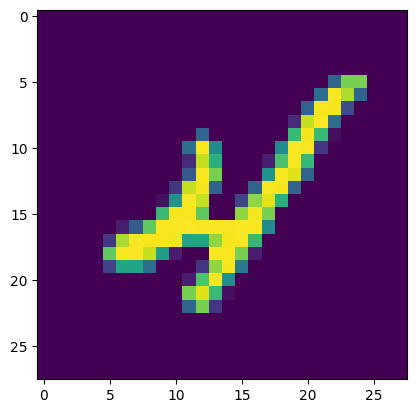

313/313 [==============================] - 0s 1ms/step
Predicted value:  [6.58847741e-04 1.34226036e-06 2.31535826e-03 1.41534065e-05
 9.88416314e-01 9.92181129e-04 6.68933662e-03 5.19722991e-04
 3.09595081e-04 8.31204306e-05]


In [95]:
n = random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()
predicted_value = model.predict(x_test)

print('Predicted value: ', predicted_value[n])

313/313 [==============================] - 0s 782us/step


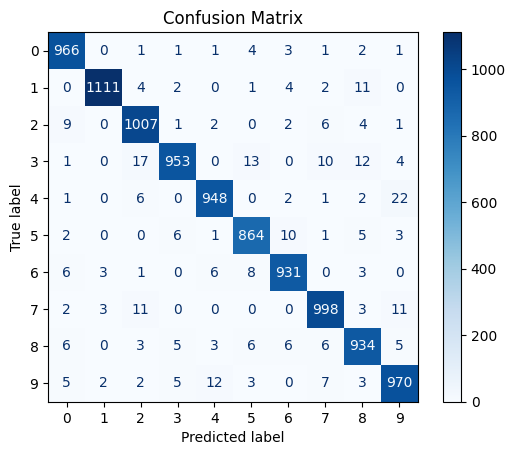

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = np.argmax(model.predict(x_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


## f. Plot the training loss and accuracy

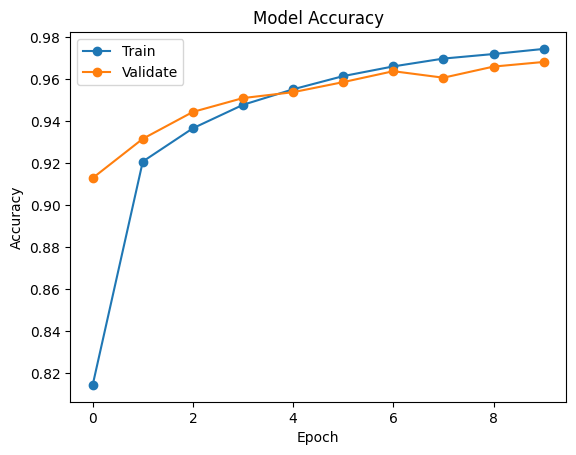

In [101]:
#Plot Accuracy
plt.plot(history.history['accuracy'], label='Train', marker='o')
plt.plot(history.history['val_accuracy'], label='Validate', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

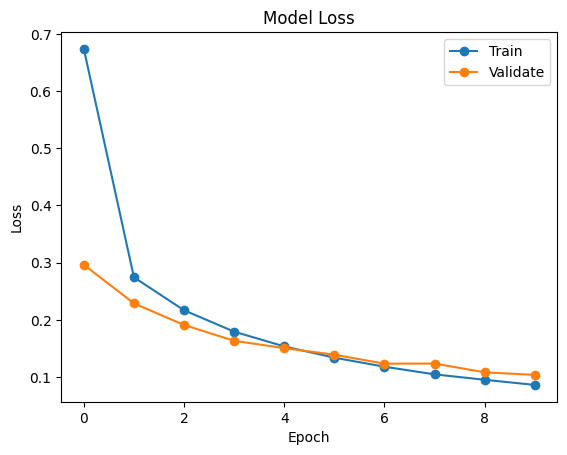

In [103]:
#Plot Loss
plt.plot(history.history['loss'], label='Train', marker='o')
plt.plot(history.history['val_loss'],label='Validate', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()